# Azure Databricks Spending Analysis

This notebook visualizes Azure Databricks spending data for 2025 (January through April) using data extracted from Azure Data Explorer. It includes:

1. Monthly spending trends
2. Distribution of spending by compute type
3. Comparison of Standard vs Premium tiers
4. Interactive visualizations using Plotly

In [10]:
# Import required libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set Matplotlib style for better aesthetics
plt.style.use('ggplot')

# Configure plots to display in the notebook
%matplotlib inline

In [11]:
# Monthly Databricks spending data from January through April 2025
monthly_data = {
    'Month': ['January', 'February', 'March', 'April'],
    'BillingMonthKey': [20250101, 20250201, 20250301, 20250401],
    'TotalCost': [4609552.597, 4419149.417, 4581708.602, 4467988.887]
}

# Create DataFrame for monthly spending
monthly_df = pd.DataFrame(monthly_data)

# Format the cost values for display
monthly_df['FormattedCost'] = monthly_df['TotalCost'].apply(lambda x: f"${x:,.2f}")
monthly_df['CostInMillions'] = monthly_df['TotalCost'] / 1000000

monthly_df

,Month,BillingMonthKey,TotalCost,FormattedCost,CostInMillions
0,January,20250101,4609552.597,"$4,609,552.60",4.609553
1,February,20250201,4419149.417,"$4,419,149.42",4.419149
2,March,20250301,4581708.602,"$4,581,708.60",4.581709
3,April,20250401,4467988.887,"$4,467,988.89",4.467989


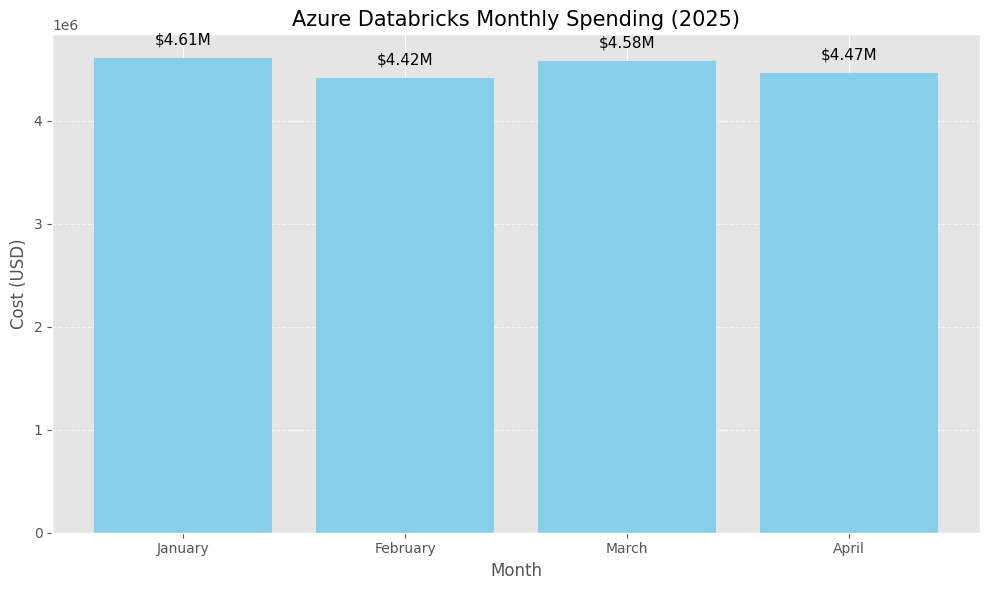

In [3]:
# Create a bar chart for monthly spending using Matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_df['Month'], monthly_df['TotalCost'], color='skyblue')
plt.title('Azure Databricks Monthly Spending (2025)', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Cost (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100000,
             f'${height/1000000:.2f}M',
             ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

In [12]:
# Create an interactive bar chart for monthly spending using Plotly
fig = px.bar(
    monthly_df, 
    x='Month', 
    y='CostInMillions',
    text=monthly_df['CostInMillions'].apply(lambda x: f"${x:.2f}M"),
    title='Azure Databricks Monthly Spending (2025)',
    labels={'CostInMillions': 'Cost (Millions USD)', 'Month': 'Month'},
    color='CostInMillions',
    color_continuous_scale='Blues',
    height=500
)

# Update the layout for better appearance
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    template='plotly_white',
    coloraxis_showscale=False
)

# Update the markers
fig.update_traces(textposition='outside', marker_line_width=1.5, marker_line_color='navy')

# Show the figure
fig.show()

In [13]:
# Databricks spending by meter type/category
meter_data = {
    'MeterName': [
        'Standard Jobs Compute DBU', 
        'Premium Jobs Compute DBU', 
        'Premium All-purpose Compute DBU', 
        'Standard All-purpose Compute DBU',
        'Standard All-Purpose Photon DBU',
        'Premium Advanced Compute Photon Delta Live Tables DBU',
        'Premium All-Purpose Photon DBU',
        'Premium Jobs Compute Photon DBU',
        'Premium SQL Analytics DBU',
        'Standard Jobs Compute Photon DBU',
        'Other'
    ],
    'TotalCost': [
        14080910.628, 
        1938604.502, 
        1212823.157, 
        322476.208, 
        158928.64, 
        125921.304, 
        117096.105, 
        52921.488, 
        50088.791, 
        12566.735,
        6062.345  # Combined smaller categories
    ]
}

# Create DataFrame for spending by meter type
meter_df = pd.DataFrame(meter_data)

# Calculate percentage of total
meter_df['TotalPercentage'] = (meter_df['TotalCost'] / meter_df['TotalCost'].sum()) * 100

# Create simplified category groupings for better visualization
meter_df['Category'] = 'Other'
meter_df.loc[meter_df['MeterName'].str.contains('Jobs'), 'Category'] = 'Jobs Compute'
meter_df.loc[meter_df['MeterName'].str.contains('All-purpose'), 'Category'] = 'All-Purpose Compute'
meter_df.loc[meter_df['MeterName'].str.contains('Delta Live Tables'), 'Category'] = 'Delta Live Tables'
meter_df.loc[meter_df['MeterName'].str.contains('SQL Analytics'), 'Category'] = 'SQL Analytics'

# Create tier classification
meter_df['Tier'] = 'Other'
meter_df.loc[meter_df['MeterName'].str.contains('Standard'), 'Tier'] = 'Standard'
meter_df.loc[meter_df['MeterName'].str.contains('Premium'), 'Tier'] = 'Premium'

# Create a flag for Photon acceleration
meter_df['Photon'] = meter_df['MeterName'].str.contains('Photon')

meter_df

,MeterName,TotalCost,TotalPercentage,Category,Tier,Photon
0,Standard Jobs Compute DBU,1.408091e+07,77.888036,Jobs Compute,Standard,False
1,Premium Jobs Compute DBU,1.938605e+06,10.723319,Jobs Compute,Premium,False
2,Premium All-purpose Compute DBU,1.212823e+06,6.708686,All-Purpose Compute,Premium,False
3,Standard All-purpose Compute DBU,3.224762e+05,1.783765,All-Purpose Compute,Standard,False
4,Standard All-Purpose Photon DBU,1.589286e+05,0.879108,Other,Standard,True
5,Premium Advanced Compute Photon Delta Live Tab...,1.259213e+05,0.696529,Delta Live Tables,Premium,True
6,Premium All-Purpose Photon DBU,1.170961e+05,0.647713,Other,Premium,True
7,Premium Jobs Compute Photon DBU,5.292149e+04,0.292733,Jobs Compute,Premium,True
8,Premium SQL Analytics DBU,5.008879e+04,0.277064,SQL Analytics,Premium,False
9,Standard Jobs Compute Photon DBU,1.256674e+04,0.069512,Jobs Compute,Standard,True


In [6]:
# Group by category for pie chart
category_df = meter_df.groupby('Category').agg({'TotalCost': 'sum'}).reset_index()
category_df['Percentage'] = (category_df['TotalCost'] / category_df['TotalCost'].sum() * 100).round(1)
category_df = category_df.sort_values('TotalCost', ascending=False)

# Create a pie chart for spending by category using Plotly
fig = px.pie(
    category_df, 
    values='TotalCost', 
    names='Category',
    title='Azure Databricks Spending by Category (2025 YTD)',
    color_discrete_sequence=px.colors.qualitative.Set3,
    labels={'TotalCost': 'Total Cost (USD)'},
    hole=0.4,
)

# Set the percentage in the hover text
fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    hovertemplate='%{label}<br>$%{value:,.2f}<br>%{percent:.1%}'
)

fig.update_layout(title_font_size=20, height=600)
fig.show()

In [7]:
# Group by tier for comparison
tier_df = meter_df.groupby('Tier').agg({'TotalCost': 'sum'}).reset_index()
tier_df['Percentage'] = (tier_df['TotalCost'] / tier_df['TotalCost'].sum() * 100).round(1)

# Create a bar chart for tier comparison
fig = px.bar(
    tier_df, 
    x='Tier', 
    y='TotalCost',
    color='Tier',
    text=tier_df['TotalCost'].apply(lambda x: f"${x/1000000:.2f}M"),
    title='Standard vs. Premium Tier Spending (2025 YTD)',
    labels={'TotalCost': 'Total Cost (USD)', 'Tier': 'Tier'},
    color_discrete_map={'Standard': '#4285F4', 'Premium': '#34A853', 'Other': '#FBBC05'},
    height=500
)

# Update layout
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    template='plotly_white'
)

# Update traces
fig.update_traces(textposition='outside', marker_line_width=1.5, marker_line_color='navy')

fig.show()

In [14]:
# Create a dashboard with multiple visualizations using Plotly subplots
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "bar"}, {"type": "pie"}],
           [{"type": "bar"}, {"type": "bar"}]],
    subplot_titles=(
        "Monthly Spending Trend", 
        "Spending by Category",
        "Standard vs. Premium Tier", 
        "Top 5 Most Expensive Services"
    ),
    vertical_spacing=0.12,
    horizontal_spacing=0.08
)

# 1. Monthly Trend (Top Left)
fig.add_trace(
    go.Bar(
        x=monthly_df['Month'],
        y=monthly_df['CostInMillions'],
        text=monthly_df['CostInMillions'].apply(lambda x: f"${x:.2f}M"),
        textposition='outside',
        name='Monthly Spending',
        marker_color='#4285F4',
        marker_line_color='navy',
        marker_line_width=1.5
    ),
    row=1, col=1
)

# 2. Category Distribution (Top Right)
for i, row in category_df.head().iterrows():
    fig.add_trace(
        go.Pie(
            labels=category_df['Category'],
            values=category_df['TotalCost'],
            name='Categories',
            textinfo='percent',
            hovertemplate='%{label}<br>$%{value:,.2f}<br>%{percent:.1%}'
        ),
        row=1, col=2
    )

# 3. Standard vs Premium (Bottom Left)
fig.add_trace(
    go.Bar(
        x=tier_df['Tier'],
        y=tier_df['TotalCost'] / 1000000,
        text=tier_df['TotalCost'].apply(lambda x: f"${x/1000000:.2f}M"),
        textposition='outside',
        name='Tier Comparison',
        marker_color=['#4285F4', '#34A853', '#FBBC05'],
        marker_line_color='navy',
        marker_line_width=1.5
    ),
    row=2, col=1
)

# 4. Top 5 Services (Bottom Right)
top5_df = meter_df.sort_values('TotalCost', ascending=False).head(5)
fig.add_trace(
    go.Bar(
        x=top5_df['MeterName'],
        y=top5_df['TotalCost'] / 1000000,
        text=top5_df['TotalCost'].apply(lambda x: f"${x/1000000:.2f}M"),
        textposition='outside',
        name='Top Services',
        marker_color='#EA4335',
        marker_line_color='maroon',
        marker_line_width=1.5
    ),
    row=2, col=2
)

# Update layout
fig.update_layout(
    title_text="Azure Databricks Spending Dashboard (2025 YTD)",
    title_font_size=24,
    showlegend=False,
    height=800,
    template='plotly_white',
)

# Update axes
fig.update_yaxes(title_text="Millions USD", row=1, col=1)
fig.update_yaxes(title_text="Millions USD", row=2, col=1)
fig.update_yaxes(title_text="Millions USD", row=2, col=2)

fig.update_xaxes(tickangle=45, row=2, col=2)

# Show the dashboard
fig.show()

In [9]:
# Prepare data for treemap visualization
treemap_data = meter_df.copy()
treemap_data['CostInMillions'] = treemap_data['TotalCost'] / 1000000
treemap_data['FormattedCost'] = treemap_data['TotalCost'].apply(lambda x: f"${x:,.2f}")

# Create a treemap visualization
fig = px.treemap(
    treemap_data,
    path=['Category', 'Tier', 'MeterName'],
    values='TotalCost',
    color='TotalCost',
    hover_data=['FormattedCost', 'TotalPercentage'],
    color_continuous_scale='Blues',
    title='Hierarchical View of Azure Databricks Spending (2025 YTD)',
)

# Update hover template to show more detailed information
fig.update_traces(
    hovertemplate='<b>%{label}</b><br>Amount: %{customdata[0]}<br>Percentage: %{customdata[1]:.2f}%<extra></extra>'
)

# Update layout
fig.update_layout(
    title_font_size=20,
    height=700,
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()

## Key Insights

1. **Consistent Monthly Spending**: Azure Databricks costs have been relatively stable over the first four months of 2025, averaging around $4.5 million per month.

2. **Jobs Compute Dominance**: Nearly 89% of all Databricks spending is on Jobs Compute services, indicating heavy usage of automated workloads rather than interactive notebooks.

3. **Standard Tier Preference**: Standard tier services account for approximately 81% of total Databricks spending, showing a significant cost savings compared to Premium tier options.

4. **Photon Adoption**: Only about 2.5% of spending is on Photon-accelerated services, suggesting an opportunity to improve performance and potentially reduce costs by increasing Photon adoption for appropriate workloads.

5. **SQL Analytics Underutilization**: SQL Analytics services represent only 0.3% of total spending, indicating potential for expanding data analytics capabilities.

## Recommendations

1. Review the usage patterns of Standard Jobs Compute (77.9% of total spending) to identify potential optimization opportunities.

2. Consider evaluating workloads running on Premium tier services to determine if they could be migrated to Standard tier.

3. Investigate opportunities to increase adoption of Photon acceleration for appropriate workloads to improve performance.

4. Monitor monthly spending trends to ensure costs remain within expected ranges.